In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression

%load_ext autoreload
%autoreload 2

#creating a data set for men 
Years = [1983, 1988, 1991, 1991, 1994, 1996, 1999, 2005, 2007, 2008, 2008, 2009]
Times = [9.93, 9.92, 9.90, 9.86, 9.85, 9.84, 9.79, 9.77, 9.74, 9.72, 9.69, 9.58]
     
#creation of the data frame
data = pd.DataFrame({"Year":Years, "Time":Times})
data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Year,Time
0,1983,9.93
1,1988,9.92
2,1991,9.90
3,1991,9.86
4,1994,9.85
5,1996,9.84
6,1999,9.79
7,2005,9.77
8,2007,9.74
9,2008,9.72


In [13]:
#defining the years to predict 
future_years = pd.DataFrame({"Year": list(range(2023, 2031))})

#Initializing and fit a linear regression model
model = LinearRegression()
model.fit(data["Year"].values.reshape(-1, 1), data["Time"])



LinearRegression()

In [16]:
predicted_times = model.predict(future_years["Year"].values.reshape(-1, 1))

#predicting 100 meters
predictions_df = pd.DataFrame({"Year": future_years["Year"], "Predicted Time": predicted_times})

#Print predicted time for each year
print(predictions_df)

   Year  Predicted Time
0  2023        9.532708
1  2024        9.521942
2  2025        9.511176
3  2026        9.500410
4  2027        9.489644
5  2028        9.478878
6  2029        9.468112
7  2030        9.457346


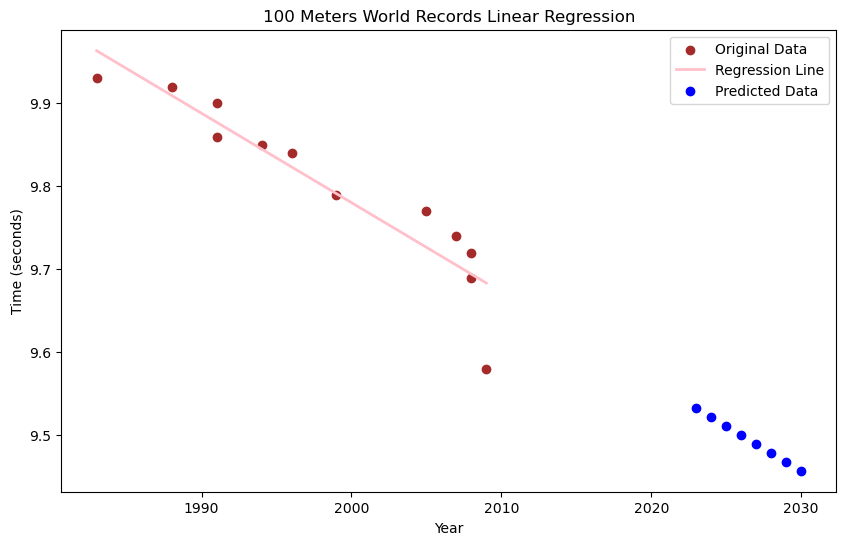

In [20]:
#creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data["Year"], data["Time"], color='brown', label='Original Data')
plt.plot(data["Year"], model.predict(data["Year"].values.reshape(-1, 1)), color='pink', linewidth=2, label='Regression Line')
plt.scatter(predictions_df["Year"], predictions_df["Predicted Time"], color='blue', label='Predicted Data')
plt.title('100 Meters World Records Linear Regression')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.show()




In [25]:
#Print predicted time for each year
for year, time in zip(future_years["Year"], predicted_times):
    print(f"Year {year}: Predicted Time = {time:.2f} seconds")

Year 2023: Predicted Time = 9.53 seconds
Year 2024: Predicted Time = 9.52 seconds
Year 2025: Predicted Time = 9.51 seconds
Year 2026: Predicted Time = 9.50 seconds
Year 2027: Predicted Time = 9.49 seconds
Year 2028: Predicted Time = 9.48 seconds
Year 2029: Predicted Time = 9.47 seconds
Year 2030: Predicted Time = 9.46 seconds


In [22]:
#Print the summary of the regression results 
print("Linear Regression Summary:")
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Coefficient (b1): {model.coef_[0]:.2f}")

Linear Regression Summary:
Intercept (b0): 31.31
Coefficient (b1): -0.01


In [23]:
# Calculate R-squared
r_squared = model.score(data["Year"].values.reshape(-1, 1), data["Time"])

# Print the R-squared value
print(f"R-squared value: {r_squared:.4f}")

R-squared value: 0.8602
